In [3]:
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error,explained_variance_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [4]:
# from pandas import random_state
data = datasets.load_boston()
X,Y = shuffle(data.data,data.target,random_state=7)

In [ ]:
ntrain = int(0.8 * len(X))
xtrain,xtest,ytrain,ytest = X[:ntrain],X[ntrain:],Y[:ntrain],Y[ntrain:]


array([[3.84970e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.91340e+02, 1.32700e+01],
       [3.04100e-02, 0.00000e+00, 5.19000e+00, ..., 2.02000e+01,
        3.94810e+02, 1.05600e+01],
       [2.41030e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.96900e+02, 1.27900e+01],
       ...,
       [8.64476e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 1.51700e+01],
       [9.39063e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.28800e+01],
       [1.31170e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        3.87690e+02, 1.40900e+01]])

In [ ]:
dtr = DecisionTreeRegressor(max_depth=6)

In [ ]:
abdtr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=6))

In [ ]:
dtr.fit(xtrain,ytrain)
ytest_predict_dtr = dtr.predict(xtest)
print("Mean Squared Error :",round(mean_squared_error(ytest,ytest_predict_dtr),2))
print("Explained Variance Score :",round(explained_variance_score(ytest,ytest_predict_dtr),2))

Mean Squared Error : 13.1
Explained Variance Score : 0.84


In [ ]:
abdtr.fit(xtrain,ytrain)
ytest_predict_abdtr = abdtr.predict(xtest)
print("Mean Squared Error :",round(mean_squared_error(ytest,ytest_predict_abdtr),2))
print("Explained Variance Score :",round(explained_variance_score(ytest,ytest_predict_abdtr),2))

Mean Squared Error : 6.86
Explained Variance Score : 0.92


In [ ]:
feature_importances = dtr.feature_importances_
print(feature_importances)
feature_names = data.feature_names
title1 = 'Decision Tree Regressor'

[0.04528211 0.         0.         0.         0.03096414 0.59994035
 0.0021999  0.10131078 0.         0.01469535 0.00589801 0.00519404
 0.19451531]


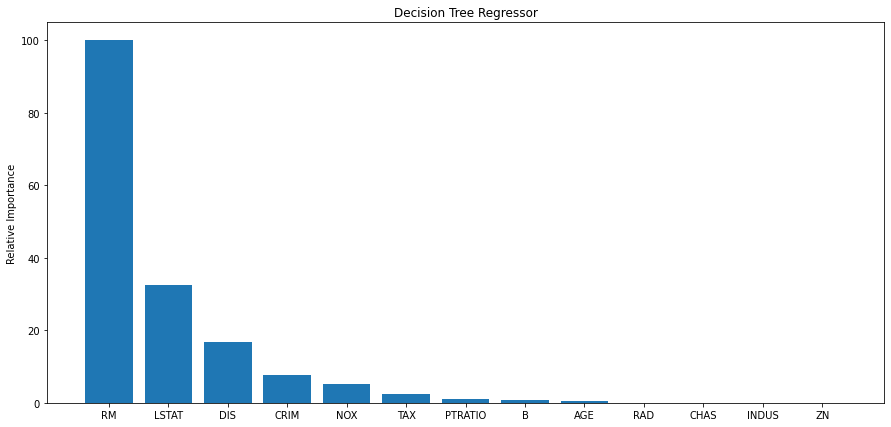

In [ ]:
feature_importances = 100.0 * feature_importances/max(feature_importances)
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0])
rcParams['figure.figsize'] =15,7
plt.bar(pos,feature_importances[index_sorted])
plt.xticks(pos,feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title(title1)
plt.show()

In [ ]:
feature_importances = abdtr.feature_importances_
feature_names = data.feature_names
title = 'AdaBoost Decision Tree Regressor'

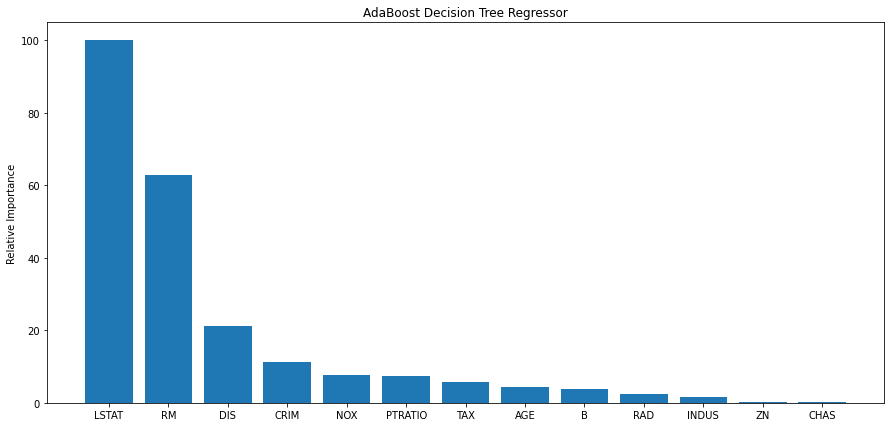

In [ ]:
feature_importances = 100.0 * feature_importances/max(feature_importances)
index_sorted = np.flipud(np.argsort(feature_importances))
pos = np.arange(index_sorted.shape[0])
rcParams['figure.figsize'] =15,7
plt.bar(pos,feature_importances[index_sorted])
plt.xticks(pos,feature_names[index_sorted])
plt.ylabel('Relative Importance')
plt.title(title)
plt.show()